# Анализ рынка недвижимости #

На основании данных сервиса Яндекс.Недвижимость - архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, необходимо научиться определять рыночную стоимость объектов недвижимости. 

**Основная задача** - установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-обзор-данных" data-toc-modified-id="Загрузка-и-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Построение-гистрограмм" data-toc-modified-id="Построение-гистрограмм-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Построение гистрограмм</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Исключение-выбросов" data-toc-modified-id="Исключение-выбросов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Исключение выбросов</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-площади,-числа-комнат-и-удалённости-от-центра" data-toc-modified-id="Зависимость-цены-от-площади,-числа-комнат-и-удалённости-от-центра-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Зависимость цены от площади, числа комнат и удалённости от центра</a></span></li><li><span><a href="#Зависимость-цены-от-категории-этажа" data-toc-modified-id="Зависимость-цены-от-категории-этажа-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Зависимость цены от категории этажа</a></span></li><li><span><a href="#Зависимость-цены-от-даты-размещения" data-toc-modified-id="Зависимость-цены-от-даты-размещения-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Зависимость цены от даты размещения</a></span></li><li><span><a href="#Анализ-10-населенных-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Анализ-10-населенных-пунктов-с-наибольшим-числом-объявлений-4.4.4"><span class="toc-item-num">4.4.4&nbsp;&nbsp;</span>Анализ 10 населенных пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Анализ-квартир-в-Санкт-Петербурге" data-toc-modified-id="Анализ-квартир-в-Санкт-Петербурге-4.4.5"><span class="toc-item-num">4.4.5&nbsp;&nbsp;</span>Анализ квартир в Санкт-Петербурге</a></span></li><li><span><a href="#Анализ-квартир--в-центре-Санкт-Петербурга" data-toc-modified-id="Анализ-квартир--в-центре-Санкт-Петербурга-4.4.6"><span class="toc-item-num">4.4.6&nbsp;&nbsp;</span>Анализ квартир  в центре Санкт-Петербурга</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры-в-центре" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-в-центре-4.4.7"><span class="toc-item-num">4.4.7&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры в центре</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка и обзор данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# чтение файла с данными и сохранение в переменную data
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# вывод первых строк таблицы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# получение общей информации о данных 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание данных:**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- balcony — число балконов;
- ceiling_height — высота потолков (м);
- cityCenters_nearest — расстояние до центра города (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия);
- first_day_exposition — дата публикации;
- floor — этаж;
- floors_total — всего этажей в доме;
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- last_price — цена на момент снятия с публикации;
- living_area — жилая площадь в квадратных метрах (м²);
- locality_name — название населённого пункта;
- open_plan — свободная планировка (булев тип);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- rooms — число комнат;
- studio — квартира-студия (булев тип);
- total_area — площадь квартиры в квадратных метрах (м²);
- total_images — число фотографий квартиры в объявлении.

*Вывод*

В таблице 22 столбца и 23699 строк. Данные представлены вещественным, целочисленным, булевым и строковым типами данных. Рассмотрим их более подробно и проведем предобработку, чтобы приступить к исследовательскому анализу данных.

## Предобработка данных

In [4]:
# подсчет числа пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
# подсчет доли пропусков
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Найдены пропущенные значения в колонках: 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'. Заполним пропуски где это необходимо.

In [6]:
# подсчет числа дубликатов
data.duplicated().sum()

0

In [7]:
# проверка названий столбцов 
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
# найдем числовое описание данных в столбце 'ceiling_height'
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Пропуски в столбце 'ceiling_height' заменим медианными значениями высоты. Также в данных имеются выбросы - 1 и 100 метров.

In [9]:
# замена пропущенных значений медианными в столбце 'ceiling_height'
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data['ceiling_height'].isna().sum()

0

Пропуски в столбцах 'living_area' и 'kitchen_area' заполним медианными значениями. 

In [10]:
# сгруппируем данные по количеству комнат и найдем медианные значения жилой площади в каждой группе
data.groupby('rooms')['living_area'].median()

rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.600
5      91.785
6     123.900
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

In [11]:
# замена пропущенных значений медианными в столбце 'living_area'
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))
data['living_area'].isna().sum()

0

In [12]:
# сгруппируем данные по количеству комнат и найдем медианные значения площади кухни в каждой группе
data.groupby('rooms')['kitchen_area'].median().round()

rooms
0       NaN
1       9.0
2       9.0
3      10.0
4      11.0
5      15.0
6      20.0
7      20.0
8      25.0
9      14.0
10     20.0
11     13.0
12    112.0
14     21.0
15    100.0
16     13.0
19     28.0
Name: kitchen_area, dtype: float64

In [13]:
# заменим пропущенные значения медианными в столбце 'kitchen_area'
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))
data['kitchen_area'].isna().sum()

197

In [14]:
# найдем количество уникальных значений комнат
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

В данных содержатся 197 квартир с количеством комнат 0. Возможно, данные квартиры являются квартирами свободной планировки, где четко не разграничена жилая и вспомогательная площадь.

Данные из колонки 'floors total' участвуют в дальнейшем исследовании, пропущенные значения в столбце оставим без изменений.

Значения в столбце 'is_apartment' имеют булев тип данных. Отсутствие значений может говорить о том, что данные квартиры не являются апартаментами, следовательно, заменим пропуски на False.

In [15]:
# замена пропущенных значений в столбце 'is_apartment'
display(data['is_apartment'].unique())
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['is_apartment'].isna().sum()

array([nan, False, True], dtype=object)

0

В данных, где не указанo количество балконов, логично предположить, что их просто нет. Поэтому заменим в колонке 'balcony' пропущенные значения на 0.

In [16]:
# замена пропущенных значений в столбце 'balcony'
display(data['balcony'].unique())
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

0

Пропущенные значения в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'locality_name' оставим без изменений, поскольку мы не имеем сведений о местоположении объектов.

Пропуски в колонке 'days_exposition' заполнять также не будем.

In [17]:
# проверка пропущенных значений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [18]:
# переведем значения к нужным типам данных
data['last_price'] = data['last_price'].round().astype('int')
data['total_area'] = data['total_area'].round().astype('int')
data['living_area'] = data['living_area'].round().astype('int')
data['ceiling_height'] = data['ceiling_height'].round(1)
data['balcony'] = data['balcony'].round().astype('int')

data['ceiling_height'] = data['ceiling_height'].astype('float32')
data['floors_total'] = data['floors_total'].astype('float32')
data['kitchen_area'] = data['kitchen_area'].astype('float32')
data['airports_nearest'] = data['airports_nearest'].astype('float32')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float32')
data['parks_around3000'] = data['parks_around3000'].astype('float32')
data['parks_nearest'] = data['parks_nearest'].astype('float32')
data['ponds_around3000'] = data['ponds_around3000'].astype('float32')
data['ponds_nearest'] = data['ponds_nearest'].astype('float32')
data['ponds_around3000'] = data['ponds_around3000'].astype('float32')
data['days_exposition'] = data['days_exposition'].astype('float32')

# приведение столбца 'first_day_exposition' к формату даты и времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
# вывод типов данных
data.dtypes

total_images                     int64
last_price                       int64
total_area                       int64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float32
floors_total                   float32
living_area                      int64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float32
balcony                          int64
locality_name                   object
airports_nearest               float32
cityCenters_nearest            float32
parks_around3000               float32
parks_nearest                  float32
ponds_around3000               float32
ponds_nearest                  float32
days_exposition                float32
dtype: object

*Вывод*

Мы наши пропущенные значения в данных, провели их логичную замену, где это необходимо, а также изменили типы данных.

## Расчёты и добавление результатов в таблицу

*Цена квадратного метра*

In [20]:
# подсчет цены квадратного метра
data['price'] = (data['last_price']/data['total_area']).round().astype('int')

*День недели, месяц и год публикации объявления*

In [21]:
# добавление в таблицу дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

*Категория этажа*

In [22]:
# подсчет и добавление в таблицу категории этажа 
def floor_function(data):
   
    floor = data['floor']
    floors_total = data['floors_total']
    
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'
        
data['floor_category'] = data.apply(floor_function, axis=1)

*Соотношение жилой и общей площади*

In [23]:
# подсчет и добавление в таблицу соотношения жилой и общей площади
data['living_area_ratio'] = (data['living_area']/data['total_area']).round(2)

*Отношение площади кухни к общей площади квартиры*

In [24]:
# подсчет и добавление в таблицу отношения площади кухни к общей площади
data['kitchen_area_ratio'] = (data['kitchen_area']/data['total_area']).round(2)

In [25]:
# вывод первых строк таблицы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108,2019-03-07,3,2.7,16.0,51,8,False,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40,2018-12-04,1,2.6,11.0,19,1,False,...,0.0,NaN,81.0,83750,1,12,2018,первый,0.48,0.28
2,10,5196000,56,2015-08-20,2,2.6,5.0,34,4,False,...,2.0,574.0,558.0,92786,3,8,2015,другой,0.61,0.15
3,0,64900000,159,2015-07-24,3,2.6,14.0,45,9,False,...,3.0,234.0,424.0,408176,4,7,2015,другой,0.28,0.06
4,2,10000000,100,2018-06-19,2,3.0,14.0,32,13,False,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.32,0.41


*Вывод*

По каждому объявлению в таблицу были добавлены следующие сведения:
- стоимость квадратного метра; 
- день недели, месяц и год публикации объявления; 
- категория этажа, на котором расположена квартира;
- рассчитано соотношение жилой площади и площади кухни к общей площади квартиры.

## Исследовательский анализ данных

### Построение гистрограмм

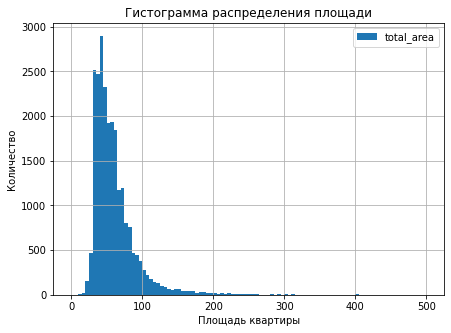

In [26]:
# гистограмма распределения площади квартир
data.plot(y='total_area', kind='hist', bins=100, range=(0,500), grid=True, figsize=(7,5))
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество')
plt.title('Гистограмма распределения площади')
plt.show()

(0.0, 120.0)

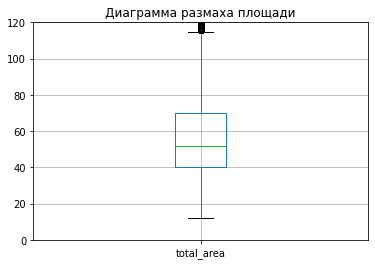

In [27]:
# диаграмма размаха площади
data.boxplot(column='total_area')
plt.title('Диаграмма размаха площади')
plt.ylim(0, 120)

In [28]:
data['total_area'].describe()

count    23699.000000
mean        60.341407
std         35.657508
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

В основном общая площадь квартир составляет от 40 до 70 кв.м.

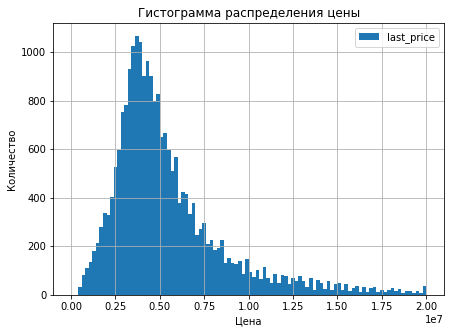

In [29]:
# гистограмма распределения цены
data.plot(y='last_price', kind='hist', bins=100, range=(0,20000000), grid=True, figsize=(7,5))
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Гистограмма распределения цены')
plt.show()

(0.0, 15000000.0)

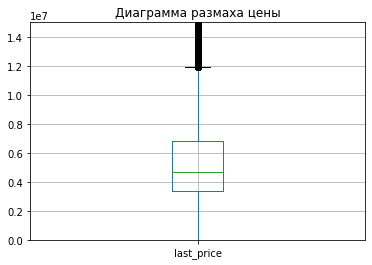

In [30]:
# диаграмма размаха цены
data.boxplot(column='last_price')
plt.title('Диаграмма размаха цены')
plt.ylim(0, 15000000)

In [31]:
data['last_price'].describe().apply("{0:.5f}".format)

count        23699.00000
mean       6541548.77155
std       10887013.26754
min          12190.00000
25%        3400000.00000
50%        4650000.00000
75%        6800000.00000
max      763000000.00000
Name: last_price, dtype: object

Стоимость квартир преимущественно расположена в диапазоне от 3.4 до 6.8 млн.рублей.

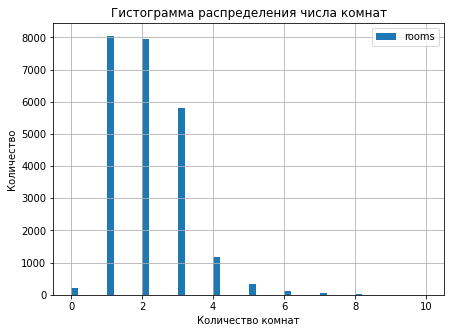

In [32]:
# гистограмма распределения числа комнат в квартирах
data.plot(y='rooms', kind='hist', bins=50, range=(0,10), grid=True, figsize=(7,5))
plt.xlabel('Количество комнат')
plt.ylabel('Количество')
plt.title('Гистограмма распределения числа комнат')
plt.show()

(0.0, 10.0)

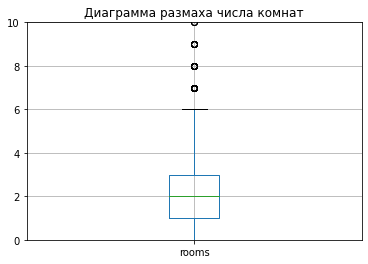

In [33]:
# диаграмма размаха количества комнат
data.boxplot(column='rooms')
plt.title('Диаграмма размаха числа комнат')
plt.ylim(0, 10)

In [34]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В объявляениях о продаже чаще всего встречаются квартиры с 1-3 комнатами. В данных имеются аномалии - 0 и 19 комнат.

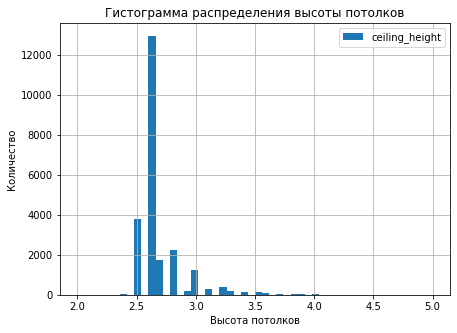

In [35]:
# диаграмма распределения высоты потолков
data.plot(y='ceiling_height', kind='hist', bins=50, range=(2,5), grid=True, figsize=(7,5))
plt.xlabel('Высота потолков')
plt.ylabel('Количество')
plt.title('Гистограмма распределения высоты потолков')
plt.show()

(2.0, 3.0)

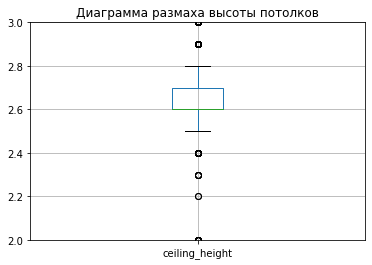

In [36]:
# диаграмма размаха высоты потолков
data.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха высоты потолков')
plt.ylim(2, 3)

In [37]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.707540
std          0.990151
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Высота потолков в квартирах обычно составляет от 2.6 до 2.7 метров. В данных встречаются редкие и выбивающиеся значения, где высота потолков составляет 1 и 100 метров.

*Вывод*

Чаще всего в объявлениях о продаже встречаются квартиры общей площадью от 40 до 70 кв.м, в квартирах от 1 до 3 комнат, высота потолков составляет 2.6-2.7 метров. Цена на квартиры варьируется в пределах от 3.4 до 6.8  млн.рублей. Во всех данных имеются аномалии и выбросы.

### Время продажи квартиры

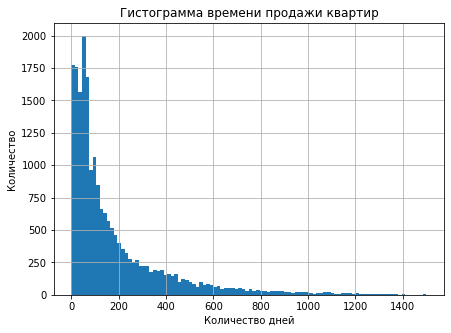

In [38]:
# гистограмма времени продажи квартир
data['days_exposition'].hist(bins=100, range=(0, 1500), figsize=(7,5))
plt.xlabel('Количество дней')
plt.ylabel('Количество')
plt.title('Гистограмма времени продажи квартир')
plt.show()

In [39]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888641
std        219.727982
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

(0.0, 600.0)

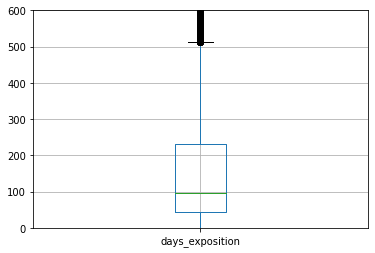

In [40]:
# построение диаграммы размаха
data.boxplot(column='days_exposition')
plt.ylim(0, 600)

*Вывод*

Наблюдается большая разница между средним значением и медианой, что говорит нам о том, что в данных имеются выбросы. Обычно продажи занимают от 45 до 230 дней. Быстрыми продажами можно считать в срок до 1 до 45 дней, а необычно долгими - более 230 дней.

### Исключение выбросов

In [41]:
# исключим из даных выбросы
new_data = data.query('12 <= total_area <= 115')
new_data = data.query('rooms <= 6')
new_data = data.query('2.5 <= ceiling_height <= 2.8')
new_data = data.query('days_exposition <= 512')
new_data = data.query('last_price <= 100000000')
new_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108,2019-03-07,3,2.7,16.0,51,8,False,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40,2018-12-04,1,2.6,11.0,19,1,False,...,0.0,NaN,81.0,83750,1,12,2018,первый,0.48,0.28
2,10,5196000,56,2015-08-20,2,2.6,5.0,34,4,False,...,2.0,574.0,558.0,92786,3,8,2015,другой,0.61,0.15
3,0,64900000,159,2015-07-24,3,2.6,14.0,45,9,False,...,3.0,234.0,424.0,408176,4,7,2015,другой,0.28,0.06
4,2,10000000,100,2018-06-19,2,3.0,14.0,32,13,False,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.32,0.41


*Вывод*

Мы исключили из данных выбросы, теперь они готовы к анализу.

### Факторы, влияющие на стоимость квартиры

#### Зависимость цены от площади, числа комнат и удалённости от центра

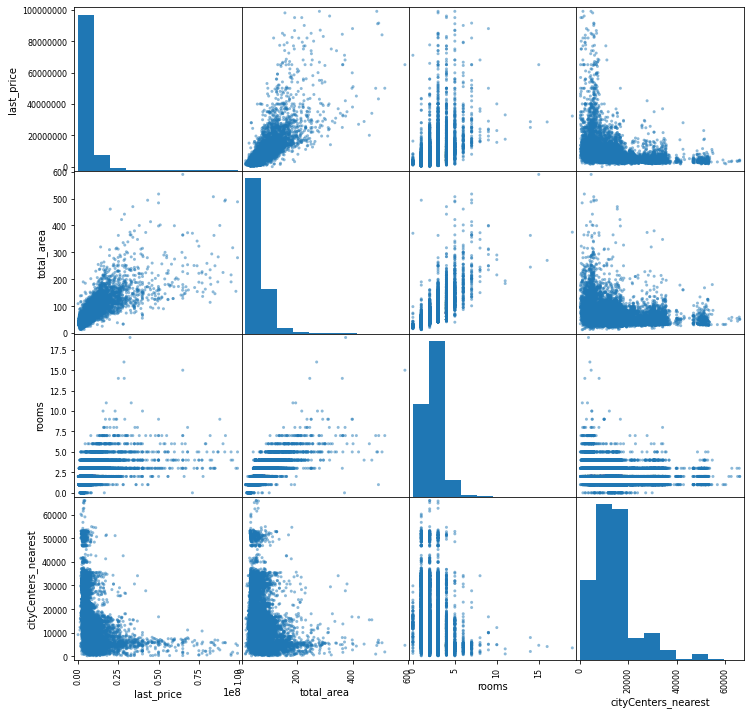

In [42]:
# построим матрицу диаграмм рассеяния зависимости цены от общей площади, количества комнат и удаленности от центра
pd.plotting.scatter_matrix(new_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']], figsize=(12, 12))
plt.show()

In [43]:
# матрица корреляции
new_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.769079,0.472441,-0.300321
total_area,0.769079,1.000000,0.769198,-0.232002
rooms,0.472441,0.769198,1.000000,-0.180969
cityCenters_nearest,-0.300321,-0.232002,-0.180969,1.000000


*Вывод*

Наибольший коэффициент корреляции наблюдается между общей площадью квартиры и ее стоимостью: чем больше площадь квартиры, тем выше стоимость.

Более низкая зависимость между стоимостью квартиры и количеством комнат, коэффициент корреляции составляет 0.47. Рост цен наблюдается для квартир, в которых от 1 до 3 комнат.

Наблюдается отрицательное значение корреляции между стоимостью квартир и расстоянием до центра: чем меньше расстояние до центра, тем выше стоимость квартир.

#### Зависимость цены от категории этажа

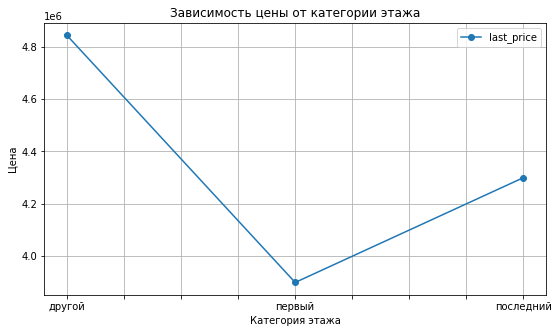

In [44]:
# построим график, который отражает медианные значения цен на квартиры по каждой категории этажа
new_data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(9, 5))
plt.xlabel('Категория этажа')
plt.ylabel('Цена')
plt.title('Зависимость цены от категории этажа')
plt.show()

Низкие по стоимости квартиры расположены на 1-м этаже, а самые дорогие - на всех этажах, кроме последнего.

#### Зависимость цены от даты размещения

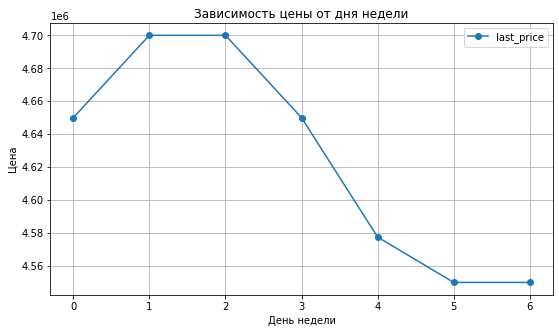

In [45]:
# зависимость цены от дня недели
new_data.pivot_table(index='weekday', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(9, 5))
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.title('Зависимость цены от дня недели')
plt.show()

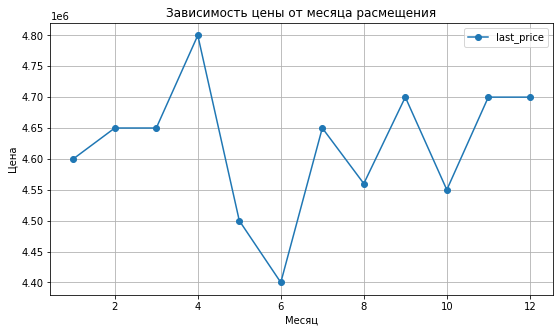

In [46]:
# зависимость цены от месяца размещения
new_data.pivot_table(index='month', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(9, 5))
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.title('Зависимость цены от месяца расмещения')
plt.show()

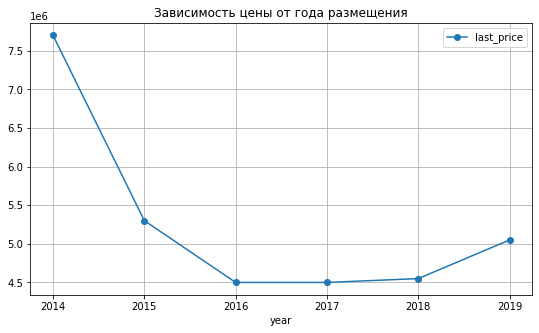

In [47]:
# зависимость цены от года размещения
new_data.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(9, 5))
plt.title('Зависимость цены от года размещения')
plt.show()

In [48]:
# матрица корреляции
new_data[['last_price', 'weekday', 'month', 'year']].corr()

,last_price,weekday,month,year
last_price,1.000000,-0.003121,0.007357,-0.053728
weekday,-0.003121,1.000000,0.011697,-0.004340
month,0.007357,0.011697,1.000000,-0.270144
year,-0.053728,-0.004340,-0.270144,1.000000


Наблюдается низкая зависимость между стоимостью квартиры и датой размещения объявлений.
Покупательская активность к концу недели снижается. В течении года спад активности наблюдается к середине лета. Самые дорогие по стоимости квартиры были размещены в 2014 году. С каждым годам стоимость квартир снижалась, но начиная с 2018 года она начала расти.

#### Анализ 10 населенных пунктов с наибольшим числом объявлений

In [49]:
# 10 населенных пунктов с наибольшим числом объявлений
locality_name_10 = new_data['locality_name'].value_counts().head(10)
new_data.query('locality_name in @locality_name_10.index')\
        .pivot_table(index='locality_name', values='price')\
        .sort_values(by='price', ascending=False).astype('int')

,price
locality_name,
Санкт-Петербург,113619
Пушкин,103170
деревня Кудрово,92508
посёлок Парголово,90177
посёлок Мурино,85783
посёлок Шушары,78680
Колпино,75448
Гатчина,68724
Всеволожск,68652


Самая высокая стоимость квадратного метра в Санкт-Петербурге - 113619 руб., самая низкая - в Выборге.

#### Анализ квартир в Санкт-Петербурге

/tmp/ipykernel_147/2381696611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['center_km'] = (new_data['cityCenters_nearest']/1000).round()


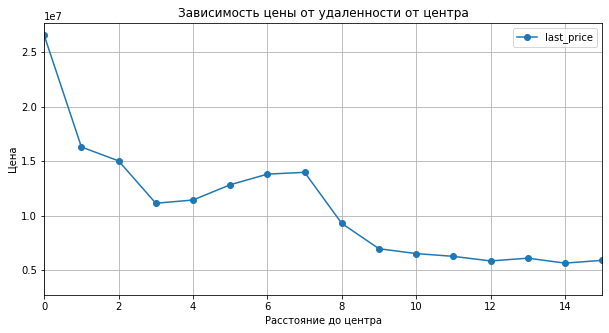

In [50]:
# добавим колонку с расстоянием до центра в км
new_data['center_km'] = (new_data['cityCenters_nearest']/1000).round()
# построим график зависимости цены от удаленности от центра
new_data.query('locality_name == "Санкт-Петербург"')\
        .pivot_table(index='center_km', values='last_price')\
        .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')
plt.title('Зависимость цены от удаленности от центра')
plt.show()

Центральной зоной в Санкт-Петербурге будем считать радиус до 7 км.

#### Анализ квартир  в центре Санкт-Петербурга

In [51]:
# выделим сегмент квартир в центре Санкт-Петербурга
data_center_spb = new_data.query('locality_name == "Санкт-Петербург" and center_km <= 7')
data_center_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio,center_km
3,0,64900000,159,2015-07-24,3,2.6,14.0,45,9,False,...,234.0,424.0,408176,4,7,2015,другой,0.28,0.06,7.0
24,8,6500000,97,2015-10-31,2,2.6,3.0,46,1,False,...,124.0,265.0,67010,5,10,2015,первый,0.47,0.20,2.0
35,6,15500000,149,2017-06-26,5,2.6,5.0,104,4,False,...,779.0,644.0,104027,0,6,2017,другой,0.70,0.11,4.0
51,7,45000000,161,2017-10-17,3,3.2,8.0,38,4,False,...,99.0,541.0,279503,1,10,2017,другой,0.24,0.31,7.0
52,20,11795000,136,2017-09-22,6,3.0,2.0,94,2,False,...,NaN,NaN,86728,4,9,2017,последний,0.69,0.08,7.0


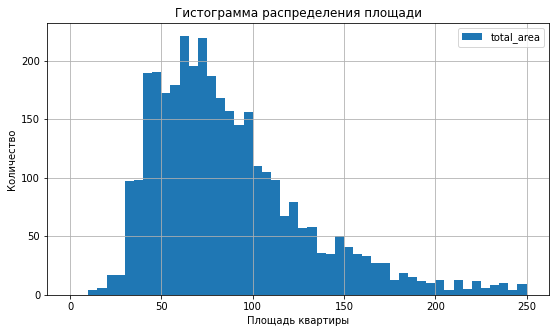

In [52]:
# гистограмма распределение площади квартир 
data_center_spb.plot(y='total_area', kind='hist', bins=50, range=(0,250), grid=True, figsize=(9,5))
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество')
plt.title('Гистограмма распределения площади')
plt.show()

In [53]:
data_center_spb['total_area'].describe()

count    3490.000000
mean       90.989112
std        54.109306
min        12.000000
25%        57.000000
50%        78.000000
75%       109.000000
max       590.000000
Name: total_area, dtype: float64

Квартиры в центре Санкт-Петербурга имеют большую площадь по сравнению с квартирами в других районах города и населенных пунктах. В основном она колеблется в пределах от 57.0 до 109.0 кв.м. 

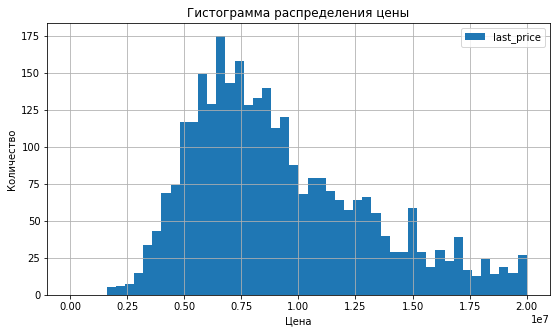

In [54]:
# гистограмма распределения цен на квартиры
data_center_spb.plot(y='last_price', kind='hist', bins=50, range=(0,20000000), grid=True, figsize=(9,5))
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Гистограмма распределения цены')
plt.show()

In [55]:
data_center_spb['last_price'].describe().apply("{0:.5f}".format)

count        3490.00000
mean     13166690.72178
std      12361850.67439
min       1600000.00000
25%       6650000.00000
50%       9100000.00000
75%      14000000.00000
max      99000000.00000
Name: last_price, dtype: object

Цены на квартиры в центре Санкт-Петербурга выше чем в других районах примерно в 2 раза, их стоимость составляет от 6.65 до 14.0 млн рублей.

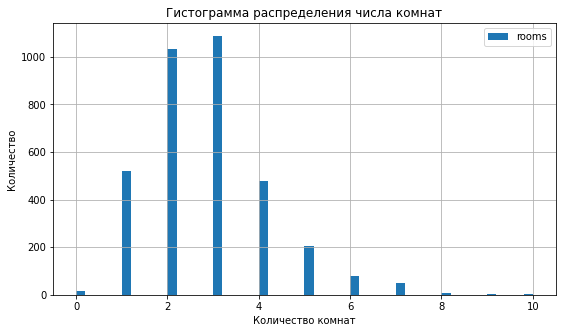

In [56]:
# гистограмма распределения числа комнат 
data_center_spb.plot(y='rooms', kind='hist', bins=50, range=(0,10), grid=True, figsize=(9,5))
plt.xlabel('Количество комнат')
plt.ylabel('Количество')
plt.title('Гистограмма распределения числа комнат')
plt.show()

In [57]:
data_center_spb['rooms'].describe()

count    3490.000000
mean        2.812894
std         1.433819
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

В центре Санкт-Петербурга выставляют на продажу в основном 2-3-комнатные квартиры.

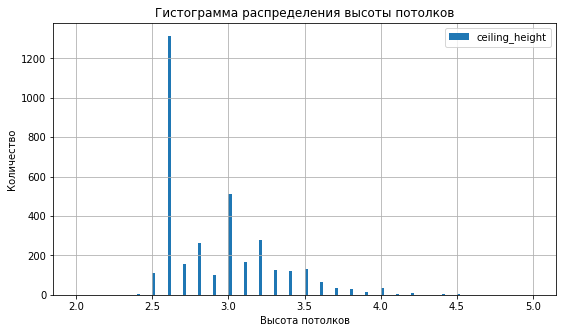

In [58]:
# гистограмма распределения высоты потолков
data_center_spb.plot(y='ceiling_height', kind='hist', bins=150, range=(2,5), grid=True, figsize=(9,5))
plt.xlabel('Высота потолков')
plt.ylabel('Количество')
plt.title('Гистограмма распределения высоты потолков')
plt.show()

In [59]:
data_center_spb['ceiling_height'].describe()

count    3490.000000
mean        2.933095
std         0.742874
min         2.400000
25%         2.600000
50%         2.800000
75%         3.100000
max        32.000000
Name: ceiling_height, dtype: float64

Высота потолков в квартирах в центральной части города выше, чем в других районах, и составляет 2.60-3.10 метров.

#### Факторы, влияющие на стоимость квартиры в центре

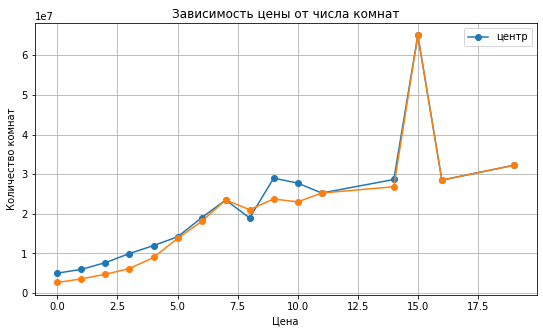

In [60]:
# зависимость цены от числа комнат
data_center_spb.sort_values(by='last_price',ascending=True)\
     .groupby('rooms')['last_price'].median()\
     .plot(x='last_price',y='rooms',style='o-',grid=True,figsize=(9,5), legend=True, label='центр')
new_data.groupby('rooms')['last_price'].median()\
     .plot(x='last_price',y='rooms',style='o-',grid=True,figsize=(9,5))
plt.xlabel('Цена')
plt.ylabel('Количество комнат')
plt.title('Зависимость цены от числа комнат')
plt.show()

In [61]:
# коэффициент корреляции по всей базе
print('Коэффициент корреляции -', (new_data['last_price'].corr(new_data['rooms']).round(2)))
# коэффициент корреляции в центре
print('Коэффициент корреляции -', (data_center_spb['last_price'].corr(data_center_spb['rooms']).round(2)))

Коэффициент корреляции - 0.47
Коэффициент корреляции - 0.4


Взаимосвязь между стоимостью квартир и количеством комнат в центре чуть меньше, чем в других районах. Чем больше комнат в квартире, тем выше ее стоимость.

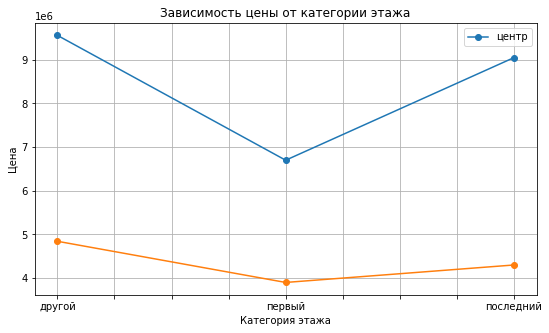

In [62]:
# зависимость цены от категории этажа
data_center_spb.sort_values(by='last_price',ascending=True)\
     .groupby('floor_category')['last_price'].median()\
     .plot(x='floor_category',y='last_price',style='o-',grid=True,figsize=(9,5), legend=True, label='центр')
new_data.groupby('floor_category')['last_price'].median()\
     .plot(x='floor_category',y='last_price',style='o-',grid=True,figsize=(9,5))
plt.xlabel('Категория этажа')
plt.ylabel('Цена')
plt.title('Зависимость цены от категории этажа')
plt.show()

В центре Санкт-Петербурга наблюдается большая зависимость между ценой квартиры и этажом, на котором она расположена, по сравнению с другими районами. Квартиры на 1 этаже стоят дешевле.

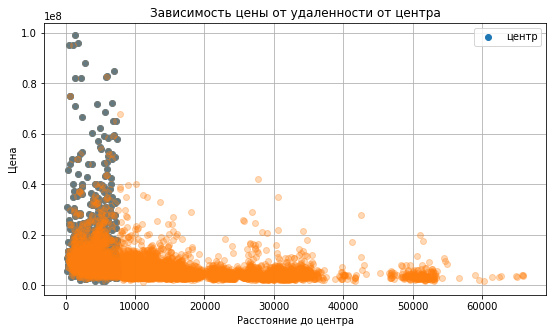

In [63]:
# зависимость цены от удаленности от центра
data_center_spb.groupby('cityCenters_nearest')['last_price'].median()\
    .plot(y='last_price', x='cityCenters_nearest', grid=True, style='o', figsize=(7, 5), legend=True, label='центр')
new_data.groupby('cityCenters_nearest')['last_price'].median()\
    .plot(y='last_price', x='cityCenters_nearest', grid=True, style='o', figsize=(9, 5), alpha=0.3)
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')
plt.title('Зависимость цены от удаленности от центра')
plt.show()

In [64]:
# коэффициент корреляции по всей базе
print('Коэффициент корреляции -', (new_data['last_price'].corr(new_data['cityCenters_nearest']).round(2)))
# коэффициент корреляции в центре
print('Коэффициент корреляции -', (data_center_spb['last_price'].corr(data_center_spb['cityCenters_nearest']).round(2)))

Коэффициент корреляции - -0.3
Коэффициент корреляции - -0.04


В центре стоимость квартир распределяется практически равномерно по мере удаленности от него и коэффициент корреляции имеет низкое отрицательно значение. В других районах города наблюдается более сильная корреляция между удаленностью от центра и стоимостью квартир.

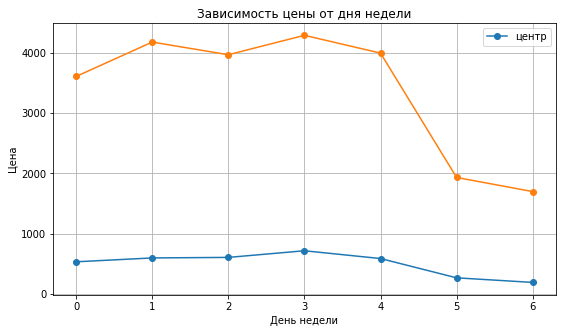

In [65]:
# зависимость цены от дня недели
data_center_spb.groupby('weekday')['last_price'].count()\
               .plot(x='weekday', y='last_price', grid=True, style='o-', figsize=(9, 5), legend=True, label='центр')
new_data.groupby('weekday')['last_price'].count()\
               .plot(x='weekday', y='last_price', grid=True, style='o-', figsize=(9, 5))
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.title('Зависимость цены от дня недели')
plt.show()

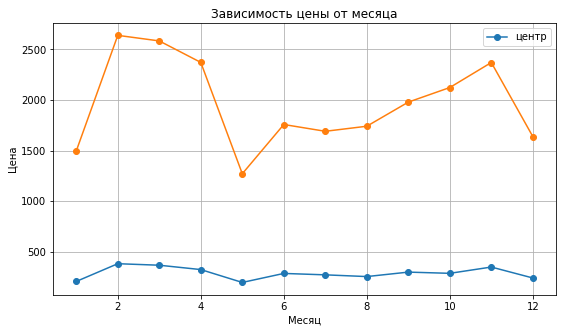

In [66]:
# зависимость цены от месяца 
data_center_spb.groupby('month')['last_price'].count()\
               .plot(x='month', y='last_price', grid=True, style='o-', figsize=(9, 5), legend=True, label='центр')
new_data.groupby('month')['last_price'].count()\
               .plot(x='month', y='last_price', grid=True, style='o-', figsize=(9, 5))
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.title('Зависимость цены от месяца')
plt.show()

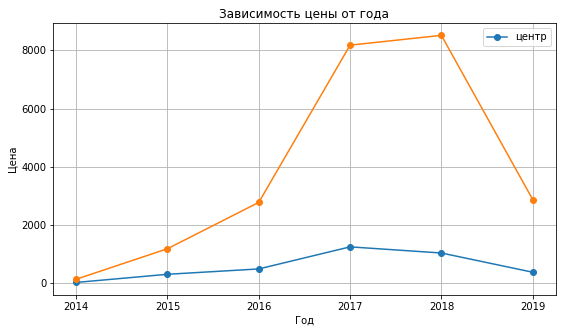

In [67]:
# зависимость цены от года размещения
data_center_spb.groupby('year')['last_price'].count()\
               .plot(x='year', y='last_price', grid=True, style='o-', figsize=(9, 5), legend=True, label='центр')
new_data.groupby('year')['last_price'].count()\
               .plot(x='year', y='last_price', grid=True, style='o-', figsize=(9, 5))
plt.xlabel('Год')
plt.ylabel('Цена')
plt.title('Зависимость цены от года')
plt.show()

Сегмент квартир в центре не имеет сильной зависимости от дня и месяца размещения объявлений, покупательская активность более равномерная на протяжении всего года, по сравнению с другими районами города. В центре Санкт-Петербурга наблюдается меньшее колебание цен на квартиры в зависимости от года продажи.

*Вывод*

Проанализировав сегмент квартир в центре Санкт-Петербурга можно сделать вывод о том, что результаты анализа отличаются от результатов по общей базе. 

Квартиры в центре имеют большую площадь, в них больше комнат, выше потолки, выше и сама стоимость квартир, примерно в 2 раза. 

В центральной части города наблюдается большая зависимость между ценой и категорией этажа. Самые дешевые квартиры расположены на 1 этаже. 

В центре Санкт-Петербурга наблюдается меньшая корреляция между стоимостью квартиры и количеством комнат, а также удаленностью квартиры от условного центра.

Сегмент квартир в центре не имеет сильной зависимости от дня и месяца размещения объявлений, покупательская активность более равномерная на протяжении всего года, по сравнению с другими районами.

## Общий вывод

В ходе проведения данного исследования было изучено влияние различных факторов на стоимость квартир, расположенных в Санкт-Петербурге и соседних населенных пунктах за несколько лет. 

Основанием для проведения исследования является архив объявлений о продаже квартир сервиса Яндекс.Недвижимость.

Полученные данные прошли необходимую предобработку, включающую в себя: заполнение пропущенных значений, где это необходимо, приведение данных к нужным типам, исключение редких и выбивающихся значений. Также была рассчитана стоимость квадратного метра, определена точная дата публикации объявлений, были категоризированы некоторые данные, определено соотношение жилой площади и площади кухни к общей площади квартиры.

Анализ общей базы показал, что срок продажи квартир в основном составляет от 45 до 230 дней. 

В объявлениях чаще всего встречаются квартиры стоимостью от 3.4 до 6.8  млн.рублей общей площадью от 40 до 70 кв.м, имеющих от 1 до 3 комнат. Высота потолков составляет 2.60-2.70 метров. Средняя стоимость квартир по общей базе составляет около 6.5 млн.рублей. 

Наибольшая зависимость наблюдается между стоимостью квартиры и общей площадью: чем больше площадь квартиры, тем выше ее стоимость. Более низкий коэффициент корреляция (0.47) между стоимостью квартиры и количеством комнат. Стоимость квартир выше, чем меньше расстояние до центра.

Анализируя сегмент квартир в центре Санкт-Петербурга, мы выяснили, что квартиры имеют большую площадь по сравнению с другими районами города, которая составляет 57.0 - 109.0 кв.м. Стоимость квартир примерно в 2 раза выше - от 6.65 до 14 млн.рублей. В основном это 2-3-комнатные квартиры. Высота потолков выше и варьируется от 2.60 до 3.10 метров. Средняя стоимость квартир в центре сотаявляет около 13.2 млн.рублей. 

В центральной части города наблюдается большая зависимость между ценой и категорией этажа. Самые дешевые квартиры расположены на 1 этаже. Здесь наблюдается меньшая корреляция между стоимостью квартиры и количеством комнат, а также удаленностью квартиры от условного центра.

Сегмент квартир в центре не имеет сильной зависимости от даты размещения объявлений по сравнению с другими районами.